In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [20]:
df=pd.read_csv('ad.csv')

In [21]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [22]:
df.shape

(200, 5)

In [23]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [27]:
cols=[['drop', 'TV', 'radio', 'newspaper', 'sales']]

In [29]:
df.columns=cols

In [32]:
df.drop('drop',axis=1,inplace=True)

C:\Users\utkarsh\Anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


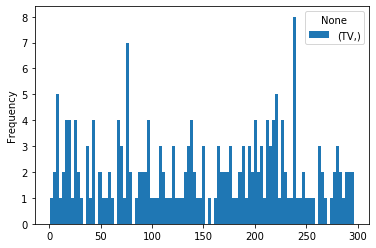

In [35]:
df['TV'].plot.hist(bins=100)

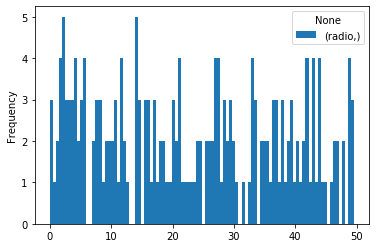

In [36]:
df['radio'].plot.hist(bins=100)

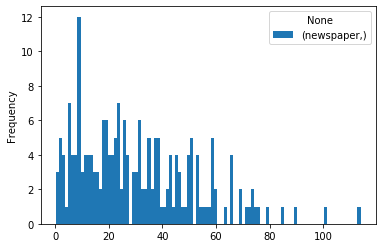

In [38]:
df['newspaper'].plot.hist(bins=100)

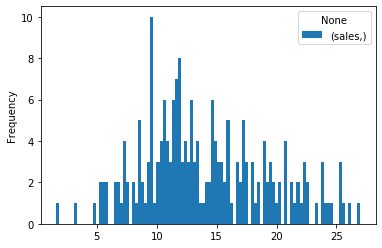

In [39]:
df['sales'].plot.hist(bins=100)

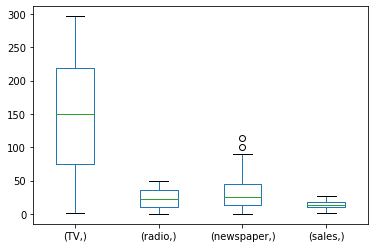

In [40]:
df.plot.box()

In [43]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [46]:
from scipy.stats import zscore

In [47]:
z=np.abs(zscore(df))

In [48]:
z_data=df[(z<3).all(axis=1)]

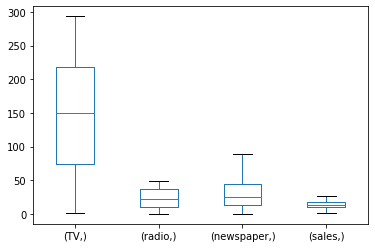

In [49]:
z_data.plot.box()

In [50]:
z_data.describe()

,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


In [51]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


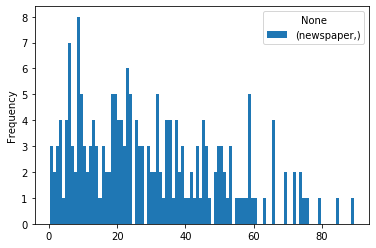

In [53]:
z_data['newspaper'].plot.hist(bins=100)

In [58]:
z_data.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [59]:
z_data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.049771,0.779121
radio,0.051978,1.000000,0.346364,0.576748
newspaper,0.049771,0.346364,1.000000,0.219555
sales,0.779121,0.576748,0.219555,1.000000


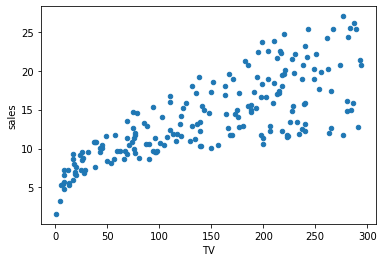

In [60]:
z_data.plot.scatter('TV','sales')

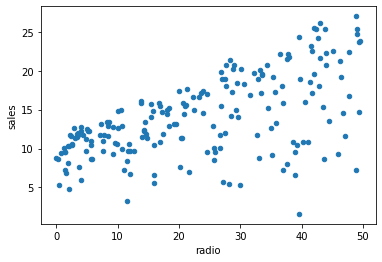

In [61]:
z_data.plot.scatter('radio','sales')

In [62]:
x=z_data.iloc[:,0:-1]

In [66]:
y=z_data.iloc[:,-1].values.reshape(-1,1)

In [67]:
list=np.arange(0,100)

In [68]:
lm=LinearRegression()

In [83]:
for m in list:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=40,random_state=m)
    lm.fit(xtrain,ytrain)
    pred=lm.predict(xtest)
    print('r2 is :',m+1,':',  r2_score(pred,ytest))

r2 is : 1 : 0.898081327132887
r2 is : 2 : 0.8963774025472829
r2 is : 3 : 0.8147471769458934
r2 is : 4 : 0.8935615717971418
r2 is : 5 : 0.8664643135809389
r2 is : 6 : 0.8385299070680055
r2 is : 7 : 0.8232676481053125
r2 is : 8 : 0.8934221865992061
r2 is : 9 : 0.7965913749055383
r2 is : 10 : 0.9178168877791578
r2 is : 11 : 0.7412434578533311
r2 is : 12 : 0.9112131044007646
r2 is : 13 : 0.8842521093391642
r2 is : 14 : 0.816302208265063
r2 is : 15 : 0.8885720745904861
r2 is : 16 : 0.8922357531358752
r2 is : 17 : 0.8800766040430703
r2 is : 18 : 0.9123234419841295
r2 is : 19 : 0.7706881995942323
r2 is : 20 : 0.9013002978531306
r2 is : 21 : 0.8913901059013588
r2 is : 22 : 0.918568201437039
r2 is : 23 : 0.929291101723334
r2 is : 24 : 0.9189770529329823
r2 is : 25 : 0.9458230919562274
r2 is : 26 : 0.9287201291996289
r2 is : 27 : 0.8396046083122244
r2 is : 28 : 0.7988553890599248
r2 is : 29 : 0.7995859350251949
r2 is : 30 : 0.8174471124017788
r2 is : 31 : 0.7904079958453565
r2 is : 32 : 0.919719

In [90]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=40,random_state=24)

In [91]:
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
lm.score(xtrain,ytrain)
pred=lm.predict(xtest)
r2=r2_score(pred,ytest)
error=mean_squared_error(pred,ytest)

In [93]:
r2

0.9458230919562274

In [94]:
error

1.3997404528615591

In [95]:
print(pred,ytest)

[[ 4.29631103]
 [21.07825712]
 [14.66962503]
 [ 6.49887728]
 [ 7.99693811]
 [ 8.08014969]
 [21.47487973]
 [12.50227763]
 [14.07771522]
 [ 9.9194312 ]
 [ 9.73536364]
 [18.95497735]
 [18.27863216]
 [14.94674356]
 [15.20926803]
 [20.29458854]
 [16.93859556]
 [17.64454479]
 [21.12699275]
 [20.29604971]
 [ 7.52950218]
 [20.6940919 ]
 [17.9052949 ]
 [ 9.53162246]
 [17.34547341]
 [14.91945382]
 [18.4108073 ]
 [19.19501887]
 [23.90716484]
 [17.25862501]
 [19.70672362]
 [ 9.86063768]
 [ 9.54244391]
 [10.311802  ]
 [10.04353497]
 [15.44884444]
 [14.82865231]
 [ 7.29019261]
 [ 7.80120291]
 [11.85249272]] [[ 5.9]
 [21.8]
 [14.7]
 [ 8.8]
 [ 9.7]
 [ 9.7]
 [21.4]
 [10.8]
 [14.4]
 [11.4]
 [11. ]
 [19.4]
 [19. ]
 [15. ]
 [13.2]
 [20.7]
 [15.9]
 [18.3]
 [23.7]
 [22.1]
 [ 7.6]
 [21.7]
 [18. ]
 [10.3]
 [18. ]
 [15.2]
 [17.6]
 [19.7]
 [26.2]
 [17.4]
 [20.7]
 [10.1]
 [11. ]
 [ 8.8]
 [11.3]
 [15.6]
 [14.9]
 [ 8.4]
 [ 9.3]
 [12.2]]


In [98]:
lm.coef_

array([[ 0.04574058,  0.19097974, -0.00463958]])